In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
color = 'nipy_spectral_r'
model_name = "ann"
alpha = 0.5

datasets =   ["adult", "compas"]
bernoullis = [ "0.03"]
variances =  ["0.05"]

### Plot Faithfulness Experiments

In [61]:
'''
for data_name in datasets:
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 3))
    
    df = None 
    for it in range(len(bernoullis)):

        p = bernoullis[it]
        variance = variances[it]

        if it == 0:
            df = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/faithfulness2" + ".csv")
            df = df.drop(columns="Unnamed: 0")
            df.loc[df['Std_Deviation'] == 0.05, 'Std_Deviation'] = str(variance)
        else:
            dfa = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/faithfulness2" + ".csv")
            dfa = dfa.drop(columns="Unnamed: 0")
            dfa.loc[dfa['Std_Deviation'] == 0.05, 'Std_Deviation'] = str(variance)
            df = df.append(dfa, ignore_index=True)

    # Rename Std deviation column name since it's incorrect
    df = df.rename(columns = {'Std_Deviation':'Variance'})
    df = df.rename(columns = {'Method':'Explanation Methods'})
    
    f = sns.boxplot(y="Faithfulness", x="Explanation Methods", hue="Variance", 
                data=df, ax=ax, palette=color, boxprops=dict(alpha=alpha))
    f.legend(title="Variances", ncol=3, framealpha=0.35)
    ax.set_title(data_name + model_name)
    ax.spines['top'].set_visible(False)
    ax.set_ylim([0, 0.6])
    plt.tight_layout()
    fig.savefig('faitfulness_'+ model_name + "_" + data_name + '.png')
    plt.close()
'''

'\nfor data_name in datasets:\n    \n    fig, ax = plt.subplots(1, 1, figsize=(15, 3))\n    \n    df = None \n    for it in range(len(bernoullis)):\n\n        p = bernoullis[it]\n        variance = variances[it]\n\n        if it == 0:\n            df = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/faithfulness2" + ".csv")\n            df = df.drop(columns="Unnamed: 0")\n            df.loc[df[\'Std_Deviation\'] == 0.05, \'Std_Deviation\'] = str(variance)\n        else:\n            dfa = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/faithfulness2" + ".csv")\n            dfa = dfa.drop(columns="Unnamed: 0")\n            dfa.loc[dfa[\'Std_Deviation\'] == 0.05, \'Std_Deviation\'] = str(variance)\n            df = df.append(dfa, ignore_index=True)\n\n    # Rename Std deviation column name since it\'s incorrect\n    df = df.rename(columns = {\'Std_Deviation\':\'Variance\'})\n    df = df.rename(columns = {\'Method\':\'Expla

### Plot Stability Experiments

In [62]:
stability_notions = ["stability2_diff_input", "stability2_diff_representation", "stability2_diff_output"]

for stability_notion in stability_notions:

    for data_name in datasets:

        fig, ax = plt.subplots(1, 1, figsize=(15, 3))

        df = None 
        for it in range(len(bernoullis)):

            p = bernoullis[it]
            variance = variances[it]

            if it == 0:
                df = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notion + ".csv")
                df = df.drop(columns="Unnamed: 0")
                #df.loc[df['Std_Deviation'] == 0.05, 'Std_Deviation'] = str(variance)
            else:
                dfa = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notion + ".csv")
                dfa = dfa.drop(columns="Unnamed: 0")
                #dfa.loc[dfa['Std_Deviation'] == 0.05, 'Std_Deviation'] = str(variance)
                df = df.append(dfa, ignore_index=True)

        # Rename Std deviation column name since it's incorrect
        df = df.rename(columns = {'Std_Deviation':'Variance'})
        df = df.rename(columns = {'Method':'Explanation Methods'})

        # Apply log transformation to Stability
        df['Stability'] = df['Stability'].apply(lambda x: np.log(x))
        
        if stability_notion == "stability2_diff_input":
            df = df.rename(columns = {'Stability':'Log Input Stability'})
            f = sns.boxplot(y="Log Input Stability", x="Explanation Methods",
                    data=df, ax=ax, palette=color, boxprops=dict(alpha=alpha))
        
        elif stability_notion == "stability2_diff_representation":
            df = df.rename(columns = {'Stability':'Log Representation Stability'})
            f = sns.boxplot(y="Log Representation Stability", x="Explanation Methods",
                    data=df, ax=ax, palette=color, boxprops=dict(alpha=alpha))
            
        elif stability_notion == "stability2_diff_output":
            df = df.rename(columns = {'Stability':'Log Output Stability'})
            f = sns.boxplot(y="Log Output Stability", x="Explanation Methods",
                    data=df, ax=ax, palette=color, boxprops=dict(alpha=alpha))
        
        #f.legend(title="Variances", ncol=3, framealpha=0.35)
        ax.set_title(data_name + "_" + model_name)
        ax.set_ylim([-7.5, 20])
        ax.axhline(0.0, linestyle='dotted', label='Base', color='k')
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        fig.savefig(stability_notion + "_" + model_name + "_" + data_name + '.png')
        plt.close()

In [63]:
### Plot Bound Experiments
# Lipschitz constant for relu = 1
# hidden layers = 100
# d = 1
# w_max: depends on data set

In [64]:
max_weights = {
    "adult": 1.3415,
    "german": 0.3234,
    "compas": 1.4558
}

In [65]:
# This is the computation of the Lipschitz constant
# for the first hidden layer with relu activation functions
# and 100 hidden unites
def _compute_lipschitz_constant(max_weight, lip_activation=1, hidden_units=100, d=1):
    L = (lip_activation * hidden_units * max_weight)**d
    return L

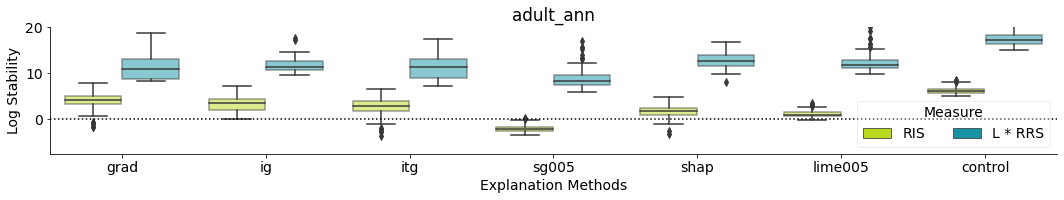

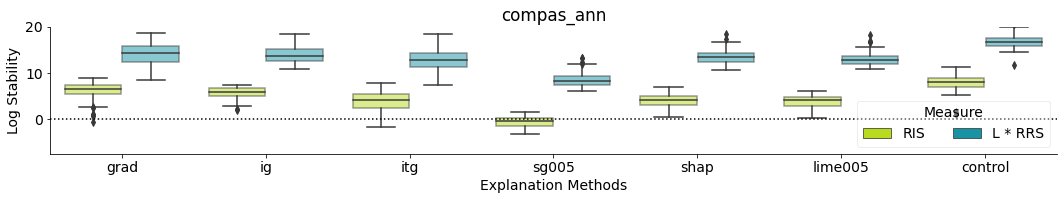

In [66]:
stability_notions = ["stability2_diff_input", "stability2_diff_representation"]
it = 0
for data_name in datasets:

    fig, ax = plt.subplots(1, 1, figsize=(15, 3))

    for it in range(len(bernoullis)):

        p = bernoullis[it]
        variance = variances[it]

        df_ris = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notions[0] + ".csv")
        df_ris = df_ris.drop(columns="Unnamed: 0")
        
        df_rrs = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notions[1] + ".csv")
        df_rrs = df_rrs.drop(columns="Unnamed: 0")

    # Rename Std deviation column name since it's incorrect
    df_rrs = df_rrs.rename(columns = {'Std_Deviation':'Variance'})
    df_rrs = df_rrs.rename(columns = {'Method':'Explanation Methods'})
    
    # Rename Std deviation column name since it's incorrect
    df_ris = df_ris.rename(columns = {'Std_Deviation':'Variance'})
    df_ris = df_ris.rename(columns = {'Method':'Explanation Methods'})


    # get lipschitz constant
    max_weight = max_weights[data_name]
    lip_constant = _compute_lipschitz_constant(max_weight, lip_activation=1, hidden_units=100, d=1)

    # Apply log transformation to Stability
    df_ris['Stability'] = df_ris['Stability'].apply(lambda x: np.log(x))
    n_elements = df_ris['Stability'].shape[0]
    new_column = np.repeat('RIS', n_elements)
    df_ris['Measure'] = new_column


    # Apply log transformation to Stability
    df_rrs['Stability'] = df_rrs['Stability'] * lip_constant
    df_rrs['Stability'] = df_rrs['Stability'].apply(lambda x: np.log(x))
    n_elements = df_rrs['Stability'].shape[0]
    new_column = np.repeat('L * RRS', n_elements)
    df_rrs['Measure'] = new_column
    
    df = df_ris.append(df_rrs)


    df = df.rename(columns = {'Stability':'Log Stability'})
    f = sns.boxplot(y="Log Stability", x="Explanation Methods", hue="Measure",
                data=df, ax=ax, palette=color, boxprops=dict(alpha=alpha))


    f.legend(title="Measure", ncol=2, framealpha=0.35)
    ax.set_title(data_name + "_" + model_name)
    ax.set_ylim([-7.5, 20])
    ax.axhline(0.0, linestyle='dotted', label='Base', color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    #fig.savefig(stability_notion + "_" + model_name + "_" + data_name + '.png')
    #plt.close()

In [67]:
import os
import ipdb
import glob
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})  # , 'font.weight': 'bold'})
# plt.style.use('ggplot')
# plt.rcParams.update({'font.size': 27})  # , 'font.weight': 'bold'})
# plt.rc('font', family='sans-serif')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color='black')
# plt.rc('font', family='sans-serif')

processing .. grad
processing .. ig
processing .. itg
processing .. sg005
processing .. shap
processing .. lime005
processing .. control
stability2_diff_input
Explanation method: grad, Mean_1=3.945, Mean_2=3.945
Explanation method: ig, Mean_1=3.345, Mean_2=3.345
Explanation method: itg, Mean_1=2.614, Mean_2=2.614
Explanation method: sg005, Mean_1=-1.997, Mean_2=-1.997
Explanation method: shap, Mean_1=1.687, Mean_2=1.687
Explanation method: lime005, Mean_1=1.150, Mean_2=1.150
Explanation method: control, Mean_1=6.349, Mean_2=6.349
processing .. grad
processing .. ig
processing .. itg
processing .. sg005
processing .. shap
processing .. lime005
processing .. control
stability2_diff_representation
Explanation method: grad, Mean_1=11.074, Mean_2=11.074
Explanation method: ig, Mean_1=11.662, Mean_2=11.662
Explanation method: itg, Mean_1=11.180, Mean_2=11.180
Explanation method: sg005, Mean_1=8.848, Mean_2=8.848
Explanation method: shap, Mean_1=12.662, Mean_2=12.662
Explanation method: lime0

PermissionError: [Errno 13] Permission denied: 'upper_bounds_compas_ann.pdf'

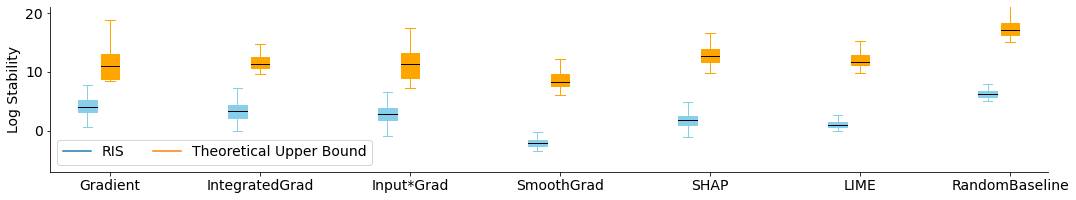

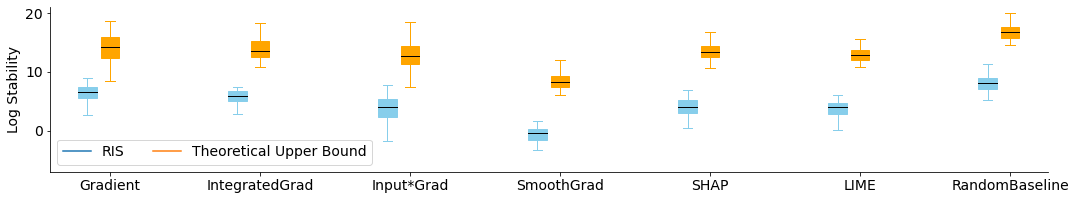

In [68]:
# inits
algos = ['grad', 'ig', 'itg', 'sg005', 'shap', 'lime005', 'control']

datasets =   ["adult", "compas", "german"]
bernoullis = ["0.03"]
variances =  ["0.05"] 
model_name = "ann"

stability_notions = ["stability2_diff_input", 
                     "stability2_diff_representation"]

for data_name in datasets:
    plt.figure(figsize=(15, 3))
    plot_names = ["RIS", "Theoretical Upper Bound"]
    plot_cols = ["skyblue", "orange"]
    plots = []
    tick_val= -0.3
    for stab_ind, stability_notion in enumerate(stability_notions):
        
        # get lipschitz constant
        max_weight = max_weights[data_name]
        lip_constant = _compute_lipschitz_constant(max_weight, lip_activation=1, hidden_units=100, d=1)

        
        df = None 
        for it in range(len(bernoullis)):

            p = bernoullis[it]
            variance = variances[it]
            if stability_notion == "stability2_diff_input":
                df = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notions[0] + ".csv")
                df = df.drop(columns="Unnamed: 0")
                
                # Apply log transformation to Stability
                df['Stability'] = df['Stability'].apply(lambda x: np.log(x))
                df_sep = []
                
            else:
                df = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notions[1] + ".csv")
                df = df.drop(columns="Unnamed: 0")
                
                # Apply log transformation to Stability
                df['Stability'] = df['Stability'] * lip_constant
                df['Stability'] = df['Stability'].apply(lambda x: np.log(x))
                df_sep = []

        # Rename Std deviation column name since it's incorrect
        #df = df.rename(columns = {'Std_Deviation':'Variance'})
        df = df.rename(columns = {'Method':'Explanation Methods'})
        

        for i, val in enumerate(algos):
            print("processing ..", val)
            df_sep.append(df[df["Explanation Methods"] == val]["Stability"].to_numpy())

        
        ## print statistics
        if stability_notion == "stability2_diff_input":
            print(stability_notion)
            for i, val in enumerate(df_sep):
                print(f'Explanation method: {algos[i]}, Mean_1={np.mean(val):.3f}, Mean_2={np.mean(df_sep[i]):.3f}')
        else:
            print(stability_notion)
            for i, val in enumerate(df_sep):
                print(f'Explanation method: {algos[i]}, Mean_1={np.mean(val):.3f}, Mean_2={np.mean(df_sep[i]):.3f}')

        
        val = plt.boxplot(df_sep, positions=np.array(range(len(df_sep)))*2.0+tick_val, sym='', 
                          widths=0.25, patch_artist=True)
        tick_val+=0.3
        plt.plot([], label=plot_names[stab_ind])
        set_box_color(val, plot_cols[stab_ind])
        
        
    plt.legend(ncol=3)
    plt.xticks(np.array(range(len(df_sep)))*2.0, ['Gradient', 'IntegratedGrad', 'Input*Grad', 
                                                  'SmoothGrad', 'SHAP', 'LIME', 'RandomBaseline'])
    plt.ylim(-7, 21)
    plt.tight_layout()
    plt.ylabel("Log Stability")
    plt.savefig("upper_bounds_"+data_name+"_"+model_name+".pdf",  bbox_inches='tight')

In [ ]:
# Correlation plots

In [69]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

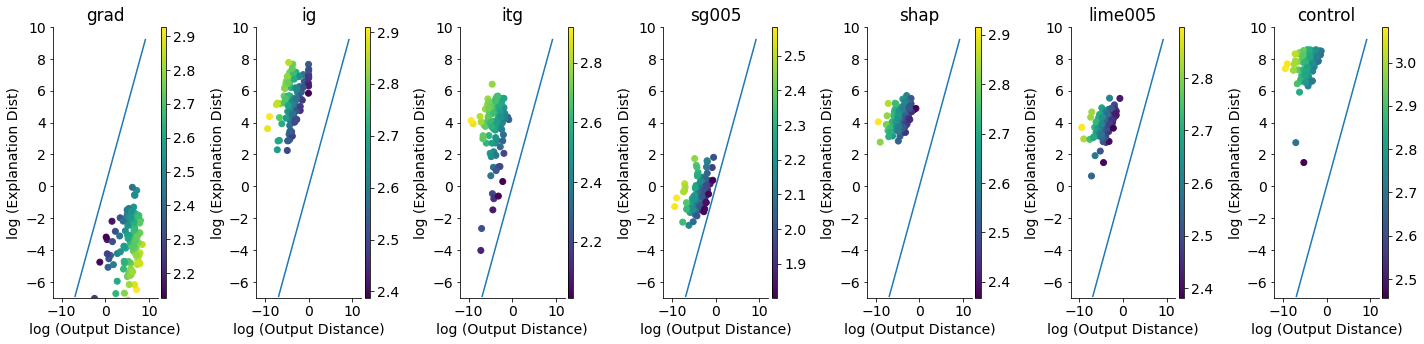

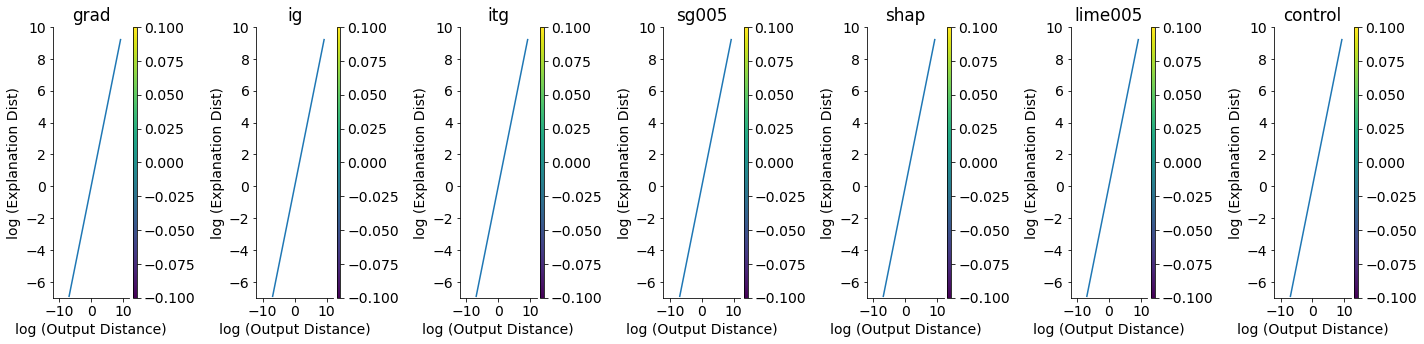

In [70]:
# inits
algos = ['grad', 'ig', 'itg', 'sg005', 'shap', 'lime005', 'control']

datasets =   ["adult", "compas"]
bernoullis = ["0.03"]
variances =  ["0.05"] 
model_name = "ann"

stability_notions = ['both'] # ["stability2_diff_output"] #["stability2_diff_input"] 

for data_name in datasets:
    fig, axs = plt.subplots(1, 7, figsize=(20, 5))
    for stab_ind, stability_notion in enumerate(stability_notions):
        
        #df = None 
        for it in range(len(bernoullis)):

            p = bernoullis[it]
            variance = variances[it]
            if stability_notion == "stability2_diff_input":
                df = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notions[0] + ".csv")
                df = df.drop(columns="Unnamed: 0")
                            
                # Apply log transformation to Stability
                df['Denominator Distance'] = df['Denominator Distance'].apply(lambda x: np.log(x))
                df['Explanation Distance'] = df['Explanation Distance'].apply(lambda x: np.log(x))
                df['Stability'] = df['Stability'].apply(lambda x: np.log(x))
                df_sep1 = []
                df_sep2 = []
                df_sep3 = []
            
            elif stability_notion == "stability2_diff_output":
                df = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notions[0] + ".csv")
                df = df.drop(columns="Unnamed: 0")
                
                # Apply log transformation to Stability
                df['Denominator Distance'] = df['Denominator Distance'].apply(lambda x: np.log(x))
                df['Explanation Distance'] = df['Explanation Distance'].apply(lambda x: np.log(x))
                df['Stability'] = df['Stability'].apply(lambda x: np.log(x))
                df_sep1 = []
                df_sep2 = []
                df_sep3 = []
                
            elif stability_notion == 'both':
                
                df1 = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + "stability2_diff_output" + ".csv")
                df1 = df1.drop(columns="Unnamed: 0")
                
                df2 = pd.read_csv(data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + "stability2_diff_input" + ".csv")
                df2 = df2.drop(columns="Unnamed: 0")
                
                # Apply log transformation to Stability
                df['Denominator Distance'] = df['Denominator Distance'].apply(lambda x: np.log(x))
                df['Explanation Distance'] = df['Explanation Distance'].apply(lambda x: np.log(x))
                df['Stability'] = df['Stability'].apply(lambda x: np.log(x))
                df_sep1 = []
                df_sep2 = []
                df_sep3 = []

        # Rename Std deviation column name since it's incorrect
        #df = df.rename(columns = {'Std_Deviation':'Variance'})
        df = df.rename(columns = {'Method':'Explanation Methods'})
        out_distances = ['Input Dist']
        x45 = np.log(np.linspace(0.001, 10000, 200000))
        y45 = np.log(np.linspace(0.001, 10000, 200000))
        for i, val in enumerate(algos):
            df_sep1.append(df[df["Explanation Methods"] == val]["Denominator Distance"].to_numpy())
            df_sep2.append(df[df["Explanation Methods"] == val]["Explanation Distance"].to_numpy())
            df_sep3.append(df[df["Explanation Methods"] == val]["Stability"].to_numpy())
        for i, val in enumerate(algos):
            if i == 0:

                im = axs[i].scatter(df_sep2[i], df_sep1[i], label=out_distances[0], c=df_sep3[i])
                axs[i].plot(x45, y45)
                #axs[i].legend()
            else:
                im = axs[i].scatter(df_sep1[i], df_sep2[i], c=df_sep3[i])
                axs[i].plot(x45, y45)
            divider = make_axes_locatable(axs[i])
            cax = divider.append_axes('right', size='5%', pad=0.05)
            fig.colorbar(im, cax=cax, orientation='vertical')
            
            axs[i].set_ylabel('log (Explanation Dist)')
            axs[i].set_xlabel('log (Output Distance)')
            axs[i].set_title(val)
            axs[i].set_xlim([-12, 12])
            axs[i].set_ylim([-7, 10])
            axs[i].set_title(val)

    plt.tight_layout()
    #plt.savefig("output_input_distance_"+data_name+"_"+model_name+".png")

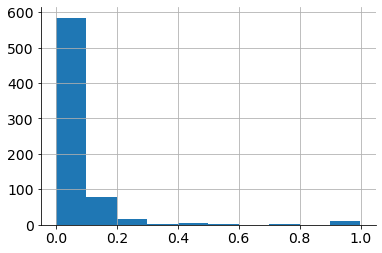

In [76]:
df1['Denominator Distance'].hist()

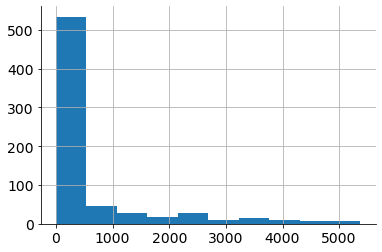

In [78]:
df1['Explanation Distance'].hist()

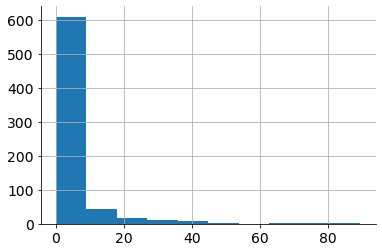

In [77]:
df2['Denominator Distance'].hist()

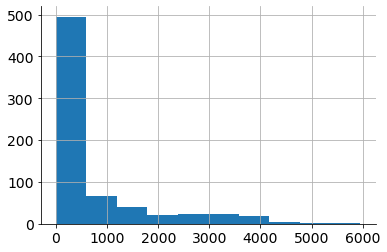

In [79]:
df2['Explanation Distance'].hist()